# Processando dataset para os modelos de Machine Learning

Esse notebook é uma continuação do notebook "PreProcessingData.ipynb".
Além disso, esse notebook cria os dois datasets finais que são usados diretamente nos modelos de ML.
Ou seja, ao final da execução desse algoritmo dois datasets estarão prontos para ser usados em modelos de ML. </ br>

O principal objetivo desse notebook é transformar o dataset original em formato CATEGORICO para NUMÉRICO.

In [549]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

In [550]:
# df = pd.read_csv('./DataSteps/STEP_6_Final_Dataset.csv', delimiter='\t')
df = pd.read_csv(r'./data/PosProcessing-v0.2.2/Final_Dataset.csv')

/Users/giggio/opt/anaconda3/envs/edaML/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,4,5,6,7,8,12,13,47,87,89,90,91,94,99) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [551]:
df

,Unnamed: 0,ID,DTHR_REGISTRO,PORTA_ENTRADA,DATA_INICIO_SINTOMAS,HISTORICO_VIAGEM,PAIS_VISITADO,CIDADES_VISITADAS,DATA_RETORNO,COLETOU_AMOSTRA,LOCAL_COLETA,DATA_COLETA,PCR_INFLUENZA,IFI_OUTRO_VIRUS,PCR_COVID_19,STATUS_COVID_FROM_MRG_REG_EST,STATUS_COVID_ORDEM,DESFECHO,CD_ATENDIMENTO,DS_TP_ATENDIMENTO,CD_PACIENTE,GENERO,IDADE,SN_OBITO,DIAGNOSTICO_SARS,OBITO_SARS,TIPO_SAIDA,TIPO_OBITO,DTHR_ALTA,CD_CID,DS_ESPECIALID_SAI,REINTER_30D,CARATER_ATENDIMENTO,EMERG_SERVICO,EMERG_RISCO,CID_DIAG_ATEND,CID_CAPITULO_DIAG,BLOCO_CENTRAL_ST,HEMODINAMICA_ST,EX_LAB_ST,EX_IMG_ST,EX_OUTROS_ST,CD_PACIENTE_FROM_ESTUDO,COMPETENCIA,PORTA_ENTRADA_FROM_ESTUDO,DATA_INICIO_SINTOMAS_FROM_ESTUDO,HISTORICO_VIAGEM_FROM_ESTUDO,CIDADES_VISITADAS_FROM_ESTUDO,LOCAL_COLETA_FROM_ESTUDO,DATA_COLETA_FROM_ESTUDO,PCR_COVID_19_FROM_ESTUDO,DESFECHO_FROM_ESTUDO,TIPO_REGISTRO,SN_IFI_OV_SINCICIAL_RESP,SN_IFI_OV_PARAINFLU3,SN_IFI_OV_PARAINFLU2,SN_IFI_OV_PARAINFLU1,SN_IFI_OV_INFLUA,SN_IFI_OV_INFLUB,SN_IFI_OV_ADENOVIRUS,SN_CRIT_CONTATO_CASO_COVID,SN_CRIT_CONTATO_CASO_SUSPEITO,SN_CRIT_PROF_SAUDE_HOSPITAL,SN_CRIT_PROF_SAUDE_OUT,SN_CRIT_SRAG,SN_CRIT_SINDROME_GRIPAL,SN_CRIT_IGNORADO,SN_CRIT_OUTROS,SN_CRIT_PROT_COVID19,ESTUDO_TP_EXPOSICAO,ESTUDO_COMORB_PREV_HAS,ESTUDO_COMORB_PREV_IAM,ESTUDO_COMORB_PREV_IC,ESTUDO_COMORB_PREV_DRC,ESTUDO_COMORB_PREV_DMI,ESTUDO_COMORB_PREV_DMII,ESTUDO_COMORB_PREV_CARCINOMA,ESTUDO_COMORB_PREV_ADENOMA,ESTUDO_COMORB_PREV_LINFOMA,ESTUDO_COMORB_PREV_AVC,ESTUDO_COMORB_PREV_ASMA,ESTUDO_COMORB_PREV_DPOC,ESTUDO_COMORB_PREV_OBESIDADE,ESTUDO_COMORB_PREV_EPILEPSIA,ESTUDO_COMORB_PREV_HIGIDO,ESTUDO_COMORB_PREV_OUTRAS,ESTUDO_CHARLSON,ESTUDO_FR_DIA_COLETA,ESTUDO_FC_DIA_COLETA,ESTUDO_PA_DIA_COLETA,ESTUDO_TEMPERATURA_DIA_COLETA,ESTUDO_SATURACAO_DIA_COLETA,ESTUDO_APACHE2,ESTUDO_RISCO,ESTUDO_TRATAMENTO,ESTUDO_COMORB_PREV_TX_ORG_SOL,ESTUDO_CONDUTA,ESTUDO_LOCAL_CONTAMINACAO,ESTUDO_LOCAL_CONTAM_UI,ESTUDO_DT_DESFECHO,ESTUDO_COMORB_PREV_DESCON,ESTUDO_COMORB_PREV_DVP,ESTUDO_COMORB_PREV_DEMENCIA,ESTUDO_COMORB_PREV_DTC,ESTUDO_COMORB_PREV_UP,ESTUDO_COMORB_PREV_DFL,ESTUDO_COMORB_PREV_DFM,ESTUDO_COMORB_PREV_HEMIPLEGIA,ESTUDO_COMORB_PREV_LEUCEMIA,ESTUDO_COMORB_PREV_HIV,ESTUDO_COMORB_PREV_TUL,ESTUDO_COMORB_PREV_TUM,STATUS_COVID_FROM_UTI,CD_PACIENTE_FROM_UTI,CD_LEITO,CD_UNIDADE,DS_UNIDADE,DT_ENTRADA,HR_ENTRADA,DT_SAIDA,HR_SAIDA,DTHR_LEITO,DATA_HORA_ENTRADA,REENTRADA,DTHR_IN_UTI,DTHR_OUT_UTI,DIAS_PRE_UTI,DIAS_NA_UTI
0,2,4463,08/07/2020 12:56:20,NaN,NaN,NaN,NaN,NaN,NaN,SIM,9 N - INTERNACAO,08/07/2020,NaN,NaN,NEGATIVO,NEGATIVOS,3,NÃO INFORMADO,925313.0,INTERNADO,454612.0,MASCULINO,"42,498401826484",N,NÃO,NÃO,ALTA,NaN,07/10/2020 13:13:46,K263,NEUROCIRURGIA,NÃO,URGÊNCIA,PRONTOPUC,LARANJA,K263,Aparelho digestivo,SIM,SIM,SIM,SIM,SIM,454612.0,01/07/2020,NaN,NaN,NaN,NaN,9 N - INTERNACAO,08/07/2020,NEGATIVO,INTERNAÇÃO,A,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,HOSPITALAR HSL,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,N,N,NEGATIVOS,454612.0,1607.0,7.0,UTI,07/12/2019,11:51:59,18/12/2019,13:48:48,26/11/2019 17:53:24,2019-12-07 11:51:59,1.0,07/12/2019 11:51:59,18/12/2019 13:48:48,10.749016,11.081123
1,3,4463,08/07/2020 12:56:20,NaN,NaN,NaN,NaN,NaN,NaN,SIM,9 N - INTERNACAO,08/07/2020,NaN,NaN,NEGATIVO,NEGATIVOS,3,NÃO INFORMADO,925313.0,INTERNADO,454612.0,MASCULINO,"42,498401826484",N,NÃO,NÃO,ALTA,NaN,07/10/2020 13:13:46,K263,NEUROCIRURGIA,NÃO,URGÊNCIA,PRONTOPUC,LARANJA,K263,Aparelho digestivo,SIM,SIM,SIM,SIM,SIM,454612.0,01/07/2020,NaN,NaN,NaN,NaN,9 N - INTERNACAO,08/07/2020,NEGATIVO,INTERNAÇÃO,A,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,HOSPITALAR HSL,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,N,N,NEGATIVOS,454612.0,1613.0,7.0,UTI,10/01/2020,05:43:14,03/02/2020,14:04:26,18/12/2019 13:48:48,2020-01-10 05:43:14,2.0,10/01/2020 05:43:14,03/02/2020 14:04:26,22.662801,24.348056
2,4,4463,08/07/2020 12:56:20,NaN,NaN,NaN,NaN,NaN,NaN,SIM,9 N - INTERNACAO,08/07/2020,NaN,NaN,NEGATIVO,NEGATIVOS,3,NÃO INFOR

O bloco abaixo exclui colunas que não são necessárias para o aprendizado dos modelos:

In [552]:
def showMissing(data):
    for column in data.columns:
        missingC = data[column].isnull().sum()
        print(column,',',missingC,',')
        
def showValues(data):
    for column in data.columns:
        values = data[column].value_counts()
        print(column,',',values,',')

In [553]:
showMissing(df)

Unnamed: 0 , 0 ,
ID , 0 ,
DTHR_REGISTRO , 0 ,
PORTA_ENTRADA , 17936 ,
DATA_INICIO_SINTOMAS , 17958 ,
HISTORICO_VIAGEM , 17993 ,
PAIS_VISITADO , 18010 ,
CIDADES_VISITADAS , 18009 ,
DATA_RETORNO , 18010 ,
COLETOU_AMOSTRA , 2 ,
LOCAL_COLETA , 3 ,
DATA_COLETA , 61 ,
PCR_INFLUENZA , 17999 ,
IFI_OUTRO_VIRUS , 17996 ,
PCR_COVID_19 , 0 ,
STATUS_COVID_FROM_MRG_REG_EST , 0 ,
STATUS_COVID_ORDEM , 0 ,
DESFECHO , 0 ,
CD_ATENDIMENTO , 0 ,
DS_TP_ATENDIMENTO , 0 ,
CD_PACIENTE , 0 ,
GENERO , 0 ,
IDADE , 0 ,
SN_OBITO , 0 ,
DIAGNOSTICO_SARS , 0 ,
OBITO_SARS , 0 ,
TIPO_SAIDA , 0 ,
TIPO_OBITO , 17943 ,
DTHR_ALTA , 20 ,
CD_CID , 21 ,
DS_ESPECIALID_SAI , 0 ,
REINTER_30D , 0 ,
CARATER_ATENDIMENTO , 0 ,
EMERG_SERVICO , 0 ,
EMERG_RISCO , 0 ,
CID_DIAG_ATEND , 2 ,
CID_CAPITULO_DIAG , 0 ,
BLOCO_CENTRAL_ST , 0 ,
HEMODINAMICA_ST , 0 ,
EX_LAB_ST , 0 ,
EX_IMG_ST , 0 ,
EX_OUTROS_ST , 0 ,
CD_PACIENTE_FROM_ESTUDO , 26 ,
COMPETENCIA , 26 ,
PORTA_ENTRADA_FROM_ESTUDO , 17797 ,
DATA_INICIO_SINTOMAS_FROM_ESTUDO , 17227 ,
HIST

In [554]:
data = df.drop([
    'ID',
    'DTHR_REGISTRO',
    'SN_OBITO',
    'DATA_INICIO_SINTOMAS',
    'PAIS_VISITADO',
    'CIDADES_VISITADAS',
    'CD_ATENDIMENTO',
    'DATA_RETORNO',
    'DATA_COLETA',
    'DTHR_ALTA',
    'COMPETENCIA',
    'CD_PACIENTE_FROM_ESTUDO',
    'PORTA_ENTRADA_FROM_ESTUDO',
    'DATA_INICIO_SINTOMAS_FROM_ESTUDO',
    'HISTORICO_VIAGEM_FROM_ESTUDO',
    'CIDADES_VISITADAS_FROM_ESTUDO',
    'LOCAL_COLETA_FROM_ESTUDO',
    'DATA_COLETA_FROM_ESTUDO',
    'PCR_COVID_19_FROM_ESTUDO',
    'DESFECHO_FROM_ESTUDO',
    'CD_PACIENTE_FROM_UTI',
    'DT_ENTRADA',
    'HR_ENTRADA',
    'DT_SAIDA',
    'HR_SAIDA',
    #'SEGUNDOS_NA_UTI',
    'STATUS_COVID_ORDEM',
    'PCR_COVID_19',
    #'STATUS_COVID',
    'PORTA_ENTRADA',
    'HISTORICO_VIAGEM',
    'DS_TP_ATENDIMENTO',
    'OBITO_SARS',
    'TIPO_SAIDA',
    'TIPO_OBITO',
    'SN_CRIT_CONTATO_CASO_SUSPEITO',
    'SN_CRIT_PROF_SAUDE_HOSPITAL',
    'SN_CRIT_PROF_SAUDE_OUT',
    'SN_CRIT_IGNORADO',
    'SN_CRIT_PROT_COVID19',
    'CD_UNIDADE',
    'CD_LEITO',
    'DS_UNIDADE'], axis=1)

In [555]:
data['CD_PACIENTE']

0         454612.0
1         454612.0
2         454612.0
3         454612.0
4        1402382.0
           ...    
18009    2392074.0
18010     981692.0
18011    2392113.0
18012    1541136.0
18013    1802152.0
Name: CD_PACIENTE, Length: 18014, dtype: float64

## Calculadora do Charlson

In [556]:
def resume(coluna, df):
    missingC = df[coluna].isnull().sum()
    print("Valores Faltantes: ", missingC)
    print(df[coluna].value_counts())
    ndf = df[~df[coluna].isna()].copy()
    lista = ndf[coluna].unique().tolist()
    print(coluna+": ", lista)
    return missingC

def pre_dataset(df):
    df = df[df['ESTUDO_CHARLSON'].isna()]
    columns_list = df.columns.to_list()
    list_comorb = []
    for i in columns_list:
        if i.startswith('ESTUDO_COMORB_PREV_'):
            list_comorb.append(i)

    df_cii = df[["CD_PACIENTE", "IDADE", *list_comorb]]
    df_cii = df_cii.rename(columns=str.lower)
    df_cii.idade = df_cii.idade.str.split(',').str[0].astype(int)
    return df_cii

def score_charlson(df_cii):
    columns_cii = ['estudo_comorb_prev_iam', 'estudo_comorb_prev_ic', 'estudo_comorb_prev_drc',
               'estudo_comorb_prev_dmii', 'estudo_comorb_prev_carcinoma',
               'estudo_comorb_prev_avc', 'estudo_comorb_prev_dpoc', 'estudo_comorb_prev_demencia', 
               'estudo_comorb_prev_leucemia', 'estudo_comorb_prev_hiv']

    score = {'estudo_comorb_prev_iam': 1, 'estudo_comorb_prev_ic': 1, 'estudo_comorb_prev_drc': 2, 'estudo_comorb_prev_dmi': 1,
             'estudo_comorb_prev_dmii': 2, 'estudo_comorb_prev_carcinoma': 6, 'estudo_comorb_prev_adenoma': 2,
             'estudo_comorb_prev_linfoma': 2, 'estudo_comorb_prev_avc': 1, 'estudo_comorb_prev_dpoc': 1,
             'estudo_comorb_prev_demencia': 1, 'estudo_comorb_prev_dtc': 1, 'estudo_comorb_prev_hemiplegia': 2,
             'estudo_comorb_prev_leucemia': 2, 'estudo_comorb_prev_hiv': 6}

    df_ciiF = df_cii[["cd_paciente", "idade", *columns_cii]]
    
    df_ciiF['estudo_comorb_prev_iam'].replace({"N": 0, "S": 1}, inplace=True)
    df_ciiF['estudo_comorb_prev_ic'].replace({"N": 0, "S": 1}, inplace=True)
    df_ciiF['estudo_comorb_prev_drc'].replace({"N": 0, "S": 2}, inplace=True)
    df_ciiF['estudo_comorb_prev_dmii'].replace({"N": 0, "S": 2}, inplace=True)
    df_ciiF['estudo_comorb_prev_carcinoma'].replace({"N": 0, "S": 6}, inplace=True)
    df_ciiF['estudo_comorb_prev_avc'].replace({"N": 0, "S": 1}, inplace=True)
    df_ciiF['estudo_comorb_prev_dpoc'].replace({"N": 0, "S": 1}, inplace=True)
    df_ciiF['estudo_comorb_prev_demencia'].replace({"N": 0, "S": 1}, inplace=True)
    df_ciiF['estudo_comorb_prev_leucemia'].replace({"N": 0, "S": 2}, inplace=True)
    df_ciiF['estudo_comorb_prev_hiv'].replace({"N": 0, "S": 6}, inplace=True)
    
    search = ' // ' or ','
    df_ciiF['count_outras']= df_cii['estudo_comorb_prev_outras'].astype(str).str.count('//|,')
    
    idade_cii = []    

    for idade in df_ciiF.idade:
        if (idade >= 80):
            idade_cii.append(4)
        elif (idade >= 70 and idade <=79):
            idade_cii.append(3)
        elif (idade >= 60 and idade <=69):
            idade_cii.append(2) 
        elif (idade >= 50 and idade <=59):
            idade_cii.append(1)
        else:
            idade_cii.append(0)

    df_ciiF['idade'] = idade_cii
        
    charlson = df_ciiF[['count_outras','idade', *columns_cii]].sum(axis = 1, skipna = True) 
    print(charlson)
    
    df_final = pd.DataFrame(charlson, columns=['estudo_charlson'])

    df_final = df_final.assign(cd_paciente = df_ciiF['cd_paciente'])
#    df_final = df_final.assign(idade = df_cii['idade'])
    
    return df_final

In [557]:
pre_processing_data = pre_dataset(data)
pre_processing_data.columns

Index(['cd_paciente', 'idade', 'estudo_comorb_prev_has',
       'estudo_comorb_prev_iam', 'estudo_comorb_prev_ic',
       'estudo_comorb_prev_drc', 'estudo_comorb_prev_dmi',
       'estudo_comorb_prev_dmii', 'estudo_comorb_prev_carcinoma',
       'estudo_comorb_prev_adenoma', 'estudo_comorb_prev_linfoma',
       'estudo_comorb_prev_avc', 'estudo_comorb_prev_asma',
       'estudo_comorb_prev_dpoc', 'estudo_comorb_prev_obesidade',
       'estudo_comorb_prev_epilepsia', 'estudo_comorb_prev_higido',
       'estudo_comorb_prev_outras', 'estudo_comorb_prev_tx_org_sol',
       'estudo_comorb_prev_descon', 'estudo_comorb_prev_dvp',
       'estudo_comorb_prev_demencia', 'estudo_comorb_prev_dtc',
       'estudo_comorb_prev_up', 'estudo_comorb_prev_dfl',
       'estudo_comorb_prev_dfm', 'estudo_comorb_prev_hemiplegia',
       'estudo_comorb_prev_leucemia', 'estudo_comorb_prev_hiv',
       'estudo_comorb_prev_tul', 'estudo_comorb_prev_tum'],
      dtype='object')

In [558]:
resume('ESTUDO_CHARLSON', df)

Valores Faltantes:  17682
5.0     64
2.0     64
1.0     64
4.0     37
3.0     33
6.0     30
7.0     21
10.0     9
8.0      6
0.0      3
9.0      1
Name: ESTUDO_CHARLSON, dtype: int64
ESTUDO_CHARLSON:  [1.0, 5.0, 2.0, 6.0, 8.0, 4.0, 3.0, 7.0, 9.0, 10.0, 0.0]


17682

In [559]:
charlson_complete = score_charlson(pre_processing_data)

0        0.0
1        0.0
2        0.0
3        0.0
4        4.0
        ... 
18009    3.0
18010    0.0
18011    0.0
18012    0.0
18013    0.0
Length: 17682, dtype: float64


/Users/giggio/opt/anaconda3/envs/edaML/lib/python3.6/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/Users/giggio/opt/anaconda3/envs/edaML/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/giggio/opt/anaconda3/envs/edaML/lib/python3.6/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [560]:
charlson_complete.head()

,estudo_charlson,cd_paciente
0,0.0,454612.0
1,0.0,454612.0
2,0.0,454612.0
3,0.0,454612.0
4,4.0,1402382.0


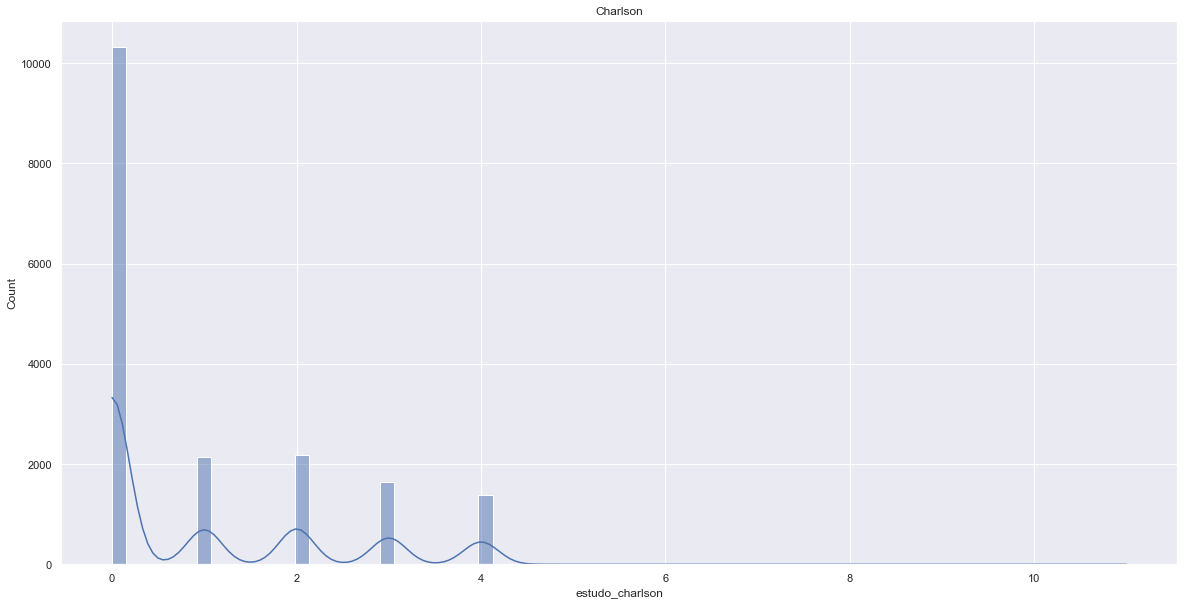

In [561]:
plt.figure(figsize=(20, 10))
sns.histplot(charlson_complete.estudo_charlson, kde=True)
plt.title("Charlson")
plt.show()

In [562]:
charlson_complete.estudo_charlson.value_counts()

0.0     10331
2.0      2190
1.0      2141
3.0      1633
4.0      1384
11.0        1
7.0         1
6.0         1
Name: estudo_charlson, dtype: int64

## Análise de cada variável restante

In [563]:
def __getDictToReplace(keys):
    d = {}
    for k in keys:
        d[k] = keys.index(k) + 1
    return d

#### COLETOU_AMOSTRA

In [564]:
data['COLETOU_AMOSTRA'] = data['COLETOU_AMOSTRA'].fillna('NI')

In [565]:
data['COLETOU_AMOSTRA'].value_counts()

SIM    17920
NAO       92
NI         2
Name: COLETOU_AMOSTRA, dtype: int64

In [566]:
data['COLETOU_AMOSTRA'] = data['COLETOU_AMOSTRA'].replace({'SIM': 1, 'NAO': 0, 'NI': 2})

#### [REMOVED] LOCAL_COLETA

In [567]:
data['LOCAL_COLETA'].value_counts() #DROP

PRONTOPUC ADULTO                        12139
PRONTOPUC ADULTO/INTE                    2838
EMERGENCIA ADULTA SUS/INTE                828
EMERGENCIA ADULTA SUS                     754
SALA DE RECUPERACAO                       612
8 N - INTERNACAO                          118
5 S - INTERNAÇÃO                          105
8 S - INTERNACAO                           88
HEMODINAMICA                               78
7 S - INTERNACAO                           77
9 N - INTERNACAO                           69
7 N - INTERNACAO                           62
9 S - INTERNACAO                           57
LACEN                                      29
COVID SUS - INTERNACAO                     27
6 S - INTERNACAO                           20
PSIQUIATRIA - INTERNACAO                   20
5 S - INTERNAÇÃO CCG                       19
UTI POS OPERATORIO CIRURGIA CARDIACA       13
6 N - INTERNACAO                            9
TRAUMATO AMBULATORIAL                       8
Particular                        

In [568]:
data = data.drop(['LOCAL_COLETA'], axis=1)

#### [REMOVED] PCR_INFLUENZA

In [569]:
data['PCR_INFLUENZA'].value_counts() #DROP

EM ANDAMENTO    14
NEGATIVO         1
Name: PCR_INFLUENZA, dtype: int64

In [570]:
data = data.drop(['PCR_INFLUENZA'], axis=1)

#### IFI_OUTRO_VIRUS

In [571]:
data['IFI_OUTRO_VIRUS'] = data['IFI_OUTRO_VIRUS'].fillna('NI')

In [572]:
data['IFI_OUTRO_VIRUS'].value_counts()

NI              17996
EM ANDAMENTO       16
NEGATIVO            2
Name: IFI_OUTRO_VIRUS, dtype: int64

In [573]:
data['IFI_OUTRO_VIRUS'] = data['IFI_OUTRO_VIRUS'].replace({'EM ANDAMENTO': 1, 'NEGATIVO': 0, 'NI': 2})

#### [REMOVED] DESFECHO

In [574]:
data['DESFECHO'].value_counts() #DROP

NÃO INFORMADO                                17905
INTERNAÇÃO                                      70
ALTA AMBULATORIAL + ISOLAMENTO DOMICILIAR       39
Name: DESFECHO, dtype: int64

In [575]:
data = data.drop(['DESFECHO'], axis=1)

#### CD_PACIENTE

Essa feature permance no dataset, pois depois permite fazer buscas mais precisas.
Não é necessário fazer nenhum processamento nela.

#### GENERO

In [576]:
data['GENERO'].value_counts()

FEMININO     10164
MASCULINO     7840
OUTROS          10
Name: GENERO, dtype: int64

In [577]:
data['GENERO'] = data['GENERO'].replace({'MASCULINO': 1, 'FEMININO': 0})

#### IDADE

In [578]:
data['IDADE'].value_counts()

70,87100456621      7
42,3833333333333    6
42,498401826484     6
41,2874429223744    6
37,9203196347032    6
                   ..
81,5559360730594    1
25,07100456621      1
21,5148401826484    1
42,0189497716895    1
18,8271689497717    1
Name: IDADE, Length: 12342, dtype: int64

Essa feature já é numérica.

#### DIAGNOSTICO_SARS

In [579]:
data['DIAGNOSTICO_SARS'].value_counts()

NÃO    16857
SIM     1157
Name: DIAGNOSTICO_SARS, dtype: int64

In [580]:
data['DIAGNOSTICO_SARS'] = data['DIAGNOSTICO_SARS'].replace({'SIM': 1, 'NÃO': 0})

#### CD_CID

In [581]:
data['CD_CID'] = data['CD_CID'].fillna('NI')

In [582]:
data['CD_CID'].value_counts()

B349    9425
B342    1154
R060     299
A419     278
I64      233
        ... 
T840       1
D442       1
B19        1
E87        1
C170       1
Name: CD_CID, Length: 1264, dtype: int64

In [583]:
keys = data['CD_CID'].value_counts().keys().tolist()

In [584]:
dictToReplace = __getDictToReplace(keys)

In [585]:
dictToReplace

{'B349': 1,
 'B342': 2,
 'R060': 3,
 'A419': 4,
 'I64': 5,
 'J069': 6,
 'K359': 7,
 'Z290': 8,
 'I219': 9,
 'I200': 10,
 'I500': 11,
 'R520': 12,
 'N180': 13,
 'J180': 14,
 'N390': 15,
 'R51': 16,
 'C61': 17,
 'R100': 18,
 'R509': 19,
 'R05': 20,
 'K810': 21,
 'R074': 22,
 'K922': 23,
 'K921': 24,
 'I743': 25,
 'A09': 26,
 'N40': 27,
 'J159': 28,
 'I509': 29,
 'A499': 30,
 'U071': 31,
 'C349': 32,
 'N179': 33,
 'G409': 34,
 'I639': 35,
 'K850': 36,
 'K920': 37,
 'N200': 38,
 'Z000': 39,
 'N189': 40,
 'I50': 41,
 'A418': 42,
 'J960': 43,
 'I269': 44,
 'C64': 45,
 'M169': 46,
 'J81': 47,
 'I20': 48,
 'D649': 49,
 'K802': 50,
 'J039': 51,
 'C509': 52,
 'R53': 53,
 'I26': 54,
 'G402': 55,
 'A41': 56,
 'K859': 57,
 'J459': 58,
 'J15': 59,
 'R11': 60,
 'R55': 61,
 'K800': 62,
 'C189': 63,
 'G35': 64,
 'J18': 65,
 'I209': 66,
 'NI': 67,
 'K808': 68,
 'I21': 69,
 'I442': 70,
 'N201': 71,
 'C348': 72,
 'D259': 73,
 'I48': 74,
 'J189': 75,
 'J441': 76,
 'I702': 77,
 'G459': 78,
 'C259': 79,
 'R0

In [586]:
data['CD_CID'] = data['CD_CID'].replace(dictToReplace)

#### DS_ESPECIALID_SAI

In [587]:
data['DS_ESPECIALID_SAI'].value_counts()

CLINICA MEDICA                    12145
CARDIOLOGIA                         831
NEFROLOGIA                          805
NEUROLOGIA                          673
PNEUMOLOGIA                         473
CIRURGIA GERAL                      389
UROLOGIA                            363
INFECTOLOGIA                        355
ONCOLOGIA CLINICA                   346
GASTROENTEROLOGIA                   197
MEDICINA INTENSIVA                  172
CIRURGIA DO APARELHO DIGESTIVO      166
GERIATRIA                           162
ORTOPEDIA E TRAUMATOLOGIA           159
CIRURGIA CARDIOVASCULAR             134
NEUROCIRURGIA                       101
GINECOLOGIA E OBSTETRICIA            99
CIRURGIA TORACICA                    92
PSIQUIATRIA                          60
MEDICINA DE EMERGENCIA               54
HEMATOLOGIA E HEMOTERAPIA            48
OTORRINOLARINGOLOGIA                 35
COLOPROCTOLOGIA                      35
CIRURGIA ONCOLOGICA                  20
REUMATOLOGIA                         16


In [588]:
keys = data['DS_ESPECIALID_SAI'].value_counts().keys().tolist()

In [589]:
dictToReplace = __getDictToReplace(keys)

In [590]:
dictToReplace

{'CLINICA MEDICA': 1,
 'CARDIOLOGIA': 2,
 'NEFROLOGIA': 3,
 'NEUROLOGIA': 4,
 'PNEUMOLOGIA': 5,
 'CIRURGIA GERAL': 6,
 'UROLOGIA': 7,
 'INFECTOLOGIA': 8,
 'ONCOLOGIA CLINICA': 9,
 'GASTROENTEROLOGIA': 10,
 'MEDICINA INTENSIVA': 11,
 'CIRURGIA DO APARELHO DIGESTIVO': 12,
 'GERIATRIA': 13,
 'ORTOPEDIA E TRAUMATOLOGIA': 14,
 'CIRURGIA CARDIOVASCULAR': 15,
 'NEUROCIRURGIA': 16,
 'GINECOLOGIA E OBSTETRICIA': 17,
 'CIRURGIA TORACICA': 18,
 'PSIQUIATRIA': 19,
 'MEDICINA DE EMERGENCIA': 20,
 'HEMATOLOGIA E HEMOTERAPIA': 21,
 'OTORRINOLARINGOLOGIA': 22,
 'COLOPROCTOLOGIA': 23,
 'CIRURGIA ONCOLOGICA': 24,
 'REUMATOLOGIA': 25,
 'CIRURGIA VASCULAR': 26,
 'BUCO MAXILO FACIAL': 27,
 'ENDOCRINOLOGIA E METABOLOGIA': 28,
 'ENDOSCOPIA': 29,
 'CIRURGIA PLASTICA': 30,
 'MASTOLOGIA': 31,
 'PEDIATRIA': 32,
 'CIRURGIA DA MÃO': 33,
 'DERMATOLOGIA': 34,
 'RADIOTERAPIA': 35,
 'MEDICINA FAMILIA E COMUNIDADE': 36,
 'MEDICINA DE TRAFEGO': 37,
 'MEDICINA ESPORTIVA': 38,
 'CIRURGIA DE CABEÇA E PESCOÇO': 39,
 'OFTALM

In [591]:
data['DS_ESPECIALID_SAI'] = data['DS_ESPECIALID_SAI'].replace(dictToReplace)

#### REINTER_30D

In [592]:
data['REINTER_30D'].value_counts()

NÃO    17408
SIM      606
Name: REINTER_30D, dtype: int64

In [593]:
data['REINTER_30D'] = data['REINTER_30D'].replace({'SIM': 1, 'NÃO': 0})

#### CARATER_ATENDIMENTO

In [594]:
data['CARATER_ATENDIMENTO'].value_counts()

URGÊNCIA    16376
ELETIVO      1638
Name: CARATER_ATENDIMENTO, dtype: int64

In [595]:
data['CARATER_ATENDIMENTO'] = data['CARATER_ATENDIMENTO'].replace({'URGÊNCIA': 1, 'ELETIVO': 0})

#### EMERG_SERVICO

In [596]:
data['EMERG_SERVICO'].value_counts()

PRONTOPUC            14241
PRONTOSUS             2082
NÃO INFORMADO         1639
TRAUMATO                50
CENTRO OBSTETRICO        2
Name: EMERG_SERVICO, dtype: int64

In [597]:
keys = data['EMERG_SERVICO'].value_counts().keys().tolist()

In [598]:
dictToReplace = __getDictToReplace(keys)

In [599]:
dictToReplace

{'PRONTOPUC': 1,
 'PRONTOSUS': 2,
 'NÃO INFORMADO': 3,
 'TRAUMATO': 4,
 'CENTRO OBSTETRICO': 5}

In [600]:
data['EMERG_SERVICO'] = data['EMERG_SERVICO'].replace(dictToReplace)

#### EMERG_RISCO

In [601]:
data['EMERG_RISCO'].value_counts()

VERDE            9217
AMARELO          3275
LARANJA          2400
NÃO INFORMADO    1674
AZUL              792
VERMELHO          656
Name: EMERG_RISCO, dtype: int64

In [602]:
keys = data['EMERG_RISCO'].value_counts().keys().tolist()

In [603]:
dictToReplace = __getDictToReplace(keys)

In [604]:
dictToReplace

{'VERDE': 1,
 'AMARELO': 2,
 'LARANJA': 3,
 'NÃO INFORMADO': 4,
 'AZUL': 5,
 'VERMELHO': 6}

In [605]:
data['EMERG_RISCO'] = data['EMERG_RISCO'].replace(dictToReplace)

#### CID_DIAG_ATEND

In [606]:
data['CID_DIAG_ATEND'] = data['CID_DIAG_ATEND'].fillna('NI')

In [607]:
data['CID_DIAG_ATEND'].value_counts()

B349    9386
B342    1216
A419     392
R060     291
I64      219
        ... 
I158       1
N858       1
E160       1
J152       1
C170       1
Name: CID_DIAG_ATEND, Length: 1247, dtype: int64

In [608]:
keys = data['CID_DIAG_ATEND'].value_counts().keys().tolist()

In [609]:
dictToReplace = __getDictToReplace(keys)

In [610]:
dictToReplace

{'B349': 1,
 'B342': 2,
 'A419': 3,
 'R060': 4,
 'I64': 5,
 'J069': 6,
 'K359': 7,
 'Z290': 8,
 'I219': 9,
 'I200': 10,
 'R520': 11,
 'I500': 12,
 'J180': 13,
 'N180': 14,
 'N390': 15,
 'R51': 16,
 'U071': 17,
 'C61': 18,
 'R509': 19,
 'R100': 20,
 'R05': 21,
 'K810': 22,
 'A418': 23,
 'J960': 24,
 'J159': 25,
 'K922': 26,
 'R074': 27,
 'A09': 28,
 'N40': 29,
 'I743': 30,
 'K921': 31,
 'I509': 32,
 'G409': 33,
 'A499': 34,
 'C349': 35,
 'I639': 36,
 'N200': 37,
 'K850': 38,
 'R579': 39,
 'Z000': 40,
 'K920': 41,
 'I50': 42,
 'N189': 43,
 'N179': 44,
 'I269': 45,
 'C64': 46,
 'C509': 47,
 'M169': 48,
 'D649': 49,
 'I20': 50,
 'J039': 51,
 'R53': 52,
 'K802': 53,
 'R55': 54,
 'K859': 55,
 'G35': 56,
 'C189': 57,
 'J81': 58,
 'I26': 59,
 'R11': 60,
 'G402': 61,
 'J459': 62,
 'K800': 63,
 'I209': 64,
 'J158': 65,
 'D259': 66,
 'I48': 67,
 'N201': 68,
 'K808': 69,
 'C348': 70,
 'I21': 71,
 'G459': 72,
 'A41': 73,
 'R070': 74,
 'I702': 75,
 'J15': 76,
 'I442': 77,
 'J441': 78,
 'E871': 79,
 

In [611]:
data['CID_DIAG_ATEND'] = data['CID_DIAG_ATEND'].replace(dictToReplace)

#### CID_CAPITULO_DIAG

In [612]:
data['CID_CAPITULO_DIAG'].value_counts()

Infecciosas e parasitárias                                                 11301
Aparelho circulatório                                                       1286
Sintomas, sinais e achados anormais de exames clínicos e de laboratório     1134
Neoplasias (tumores)                                                         879
Aparelho digestivo                                                           836
Aparelho respiratório                                                        724
Aparelho geniturinário                                                       589
Sistema nervoso                                                              279
Fatores que influenciam o estado de saúde                                    213
Lesões, envenenamento e algumas outras conseqüências de causas externas      157
Transtornos mentais e comportamentais                                        137
Endócrinas, nutricionais e metabólicas                                       123
Sistema osteomuscular e do t

In [613]:
keys = data['CID_CAPITULO_DIAG'].value_counts().keys().tolist()

In [614]:
dictToReplace = __getDictToReplace(keys)

In [615]:
dictToReplace

{'Infecciosas e parasitárias': 1,
 'Aparelho circulatório': 2,
 'Sintomas, sinais e achados anormais de exames clínicos e de laboratório': 3,
 'Neoplasias (tumores)': 4,
 'Aparelho digestivo': 5,
 'Aparelho respiratório': 6,
 'Aparelho geniturinário': 7,
 'Sistema nervoso': 8,
 'Fatores que influenciam o estado de saúde': 9,
 'Lesões, envenenamento e algumas outras conseqüências de causas externas': 10,
 'Transtornos mentais e comportamentais': 11,
 'Endócrinas, nutricionais e metabólicas': 12,
 'Sistema osteomuscular e do tecido conjuntivo': 13,
 'Sangue e órgãos hematopoéticos e transtornos imunitários': 14,
 'Códigos para propósitos especiais': 15,
 'Pele e do tecido subcutâneo': 16,
 'Causas externas de morbidade e de mortalidade': 17,
 'Malformações congênitas, deformidades e anomalias cromossômicas': 18,
 'Ouvido e da apófise mastóide': 19,
 'Olho e anexos': 20,
 'Gravidez, parto e puerpério': 21,
 'Sem Informação': 22}

In [616]:
data['CID_CAPITULO_DIAG'] = data['CID_CAPITULO_DIAG'].replace(dictToReplace)

#### BLOCO_CENTRAL_ST

In [617]:
data['BLOCO_CENTRAL_ST'].value_counts()

NÃO    15881
SIM     2133
Name: BLOCO_CENTRAL_ST, dtype: int64

In [618]:
data['BLOCO_CENTRAL_ST'] = data['BLOCO_CENTRAL_ST'].replace({'SIM': 1, 'NÃO': 0})

#### HEMODINAMICA_ST

In [619]:
data['HEMODINAMICA_ST'].value_counts()

NÃO    17355
SIM      659
Name: HEMODINAMICA_ST, dtype: int64

In [620]:
data['HEMODINAMICA_ST'] = data['HEMODINAMICA_ST'].replace({'SIM': 1, 'NÃO': 0})

#### EX_LAB_ST

In [621]:
data['EX_LAB_ST'].value_counts()

SIM    17905
NÃO      109
Name: EX_LAB_ST, dtype: int64

In [622]:
data['EX_LAB_ST'] = data['EX_LAB_ST'].replace({'SIM': 1, 'NÃO': 0})

#### EX_IMG_ST

In [623]:
data['EX_IMG_ST'].value_counts()

NÃO    10837
SIM     7177
Name: EX_IMG_ST, dtype: int64

In [624]:
data['EX_IMG_ST'] = data['EX_IMG_ST'].replace({'SIM': 1, 'NÃO': 0})

#### EX_OUTROS_ST

In [625]:
data['EX_OUTROS_ST'].value_counts()

NÃO    15660
SIM     2354
Name: EX_OUTROS_ST, dtype: int64

In [626]:
data['EX_OUTROS_ST'] = data['EX_OUTROS_ST'].replace({'SIM': 1, 'NÃO': 0})

#### TIPO_REGISTRO

In [627]:
data['TIPO_REGISTRO'] = data['TIPO_REGISTRO'].fillna('NI')

In [628]:
data['TIPO_REGISTRO'].value_counts()

A     17834
M       154
NI       26
Name: TIPO_REGISTRO, dtype: int64

In [629]:
data['TIPO_REGISTRO'] = data['TIPO_REGISTRO'].replace({'A': 1, 'M': 0, 'NI': 2})

#### [REMOVED] SN_IFI_OV_SINCICIAL_RESP

In [630]:
data['SN_IFI_OV_SINCICIAL_RESP'].value_counts() #DROP

N    17988
Name: SN_IFI_OV_SINCICIAL_RESP, dtype: int64

In [631]:
data = data.drop(['SN_IFI_OV_SINCICIAL_RESP'], axis=1)

#### [REMOVED] SN_IFI_OV_PARAINFLU3

In [632]:
data['SN_IFI_OV_PARAINFLU3'].value_counts() #DROP

N    17988
Name: SN_IFI_OV_PARAINFLU3, dtype: int64

In [633]:
data = data.drop(['SN_IFI_OV_PARAINFLU3'], axis=1)

#### [REMOVED] SN_IFI_OV_PARAINFLU2

In [634]:
data['SN_IFI_OV_PARAINFLU2'].value_counts() #DROP

N    17988
Name: SN_IFI_OV_PARAINFLU2, dtype: int64

In [635]:
data = data.drop(['SN_IFI_OV_PARAINFLU2'], axis=1)

#### [REMOVED] SN_IFI_OV_PARAINFLU1

In [636]:
data['SN_IFI_OV_PARAINFLU1'].value_counts() #DROP

N    17988
Name: SN_IFI_OV_PARAINFLU1, dtype: int64

In [637]:
data = data.drop(['SN_IFI_OV_PARAINFLU1'], axis=1)

#### [REMOVED] SN_IFI_OV_INFLUA

In [638]:
data['SN_IFI_OV_INFLUA'].value_counts() #DROP

N    17988
Name: SN_IFI_OV_INFLUA, dtype: int64

In [639]:
data = data.drop(['SN_IFI_OV_INFLUA'], axis=1)

#### [REMOVED] SN_IFI_OV_INFLUB

In [640]:
data['SN_IFI_OV_INFLUB'].value_counts() #DROP

N    17988
Name: SN_IFI_OV_INFLUB, dtype: int64

In [641]:
data = data.drop(['SN_IFI_OV_INFLUB'], axis=1)

#### [REMOVED] SN_IFI_OV_ADENOVIRUS

In [642]:
data['SN_IFI_OV_ADENOVIRUS'].value_counts() #DROP

N    17988
Name: SN_IFI_OV_ADENOVIRUS, dtype: int64

In [643]:
data = data.drop(['SN_IFI_OV_ADENOVIRUS'], axis=1)

#### SN_CRIT_CONTATO_CASO_COVID

In [644]:
data['SN_CRIT_CONTATO_CASO_COVID'] = data['SN_CRIT_CONTATO_CASO_COVID'].fillna('NI')

In [645]:
data['SN_CRIT_CONTATO_CASO_COVID'].value_counts() 

N     17979
NI       26
S         9
Name: SN_CRIT_CONTATO_CASO_COVID, dtype: int64

In [646]:
data['SN_CRIT_CONTATO_CASO_COVID'] = data['SN_CRIT_CONTATO_CASO_COVID'].replace({'S': 1, 'N': 0, 'NI': 2})

#### SN_CRIT_SRAG

In [647]:
data['SN_CRIT_SRAG'] = data['SN_CRIT_SRAG'].fillna('NI')

In [648]:
data['SN_CRIT_SRAG'].value_counts()

N     17895
S        93
NI       26
Name: SN_CRIT_SRAG, dtype: int64

In [649]:
data['SN_CRIT_SRAG'] = data['SN_CRIT_SRAG'].replace({'S': 1, 'N': 0, 'NI': 2})

#### SN_CRIT_SINDROME_GRIPAL

In [650]:
data['SN_CRIT_SINDROME_GRIPAL'] = data['SN_CRIT_SINDROME_GRIPAL'].fillna('NI')

In [651]:
data['SN_CRIT_SINDROME_GRIPAL'].value_counts()

N     17986
NI       26
S         2
Name: SN_CRIT_SINDROME_GRIPAL, dtype: int64

In [652]:
data['SN_CRIT_SINDROME_GRIPAL'] = data['SN_CRIT_SINDROME_GRIPAL'].replace({'S': 1, 'N': 0, 'NI': 2})

#### SN_CRIT_OUTROS

In [653]:
# Verificar
data['SN_CRIT_OUTROS'].value_counts() #DROP

N    17965
S       23
Name: SN_CRIT_OUTROS, dtype: int64

In [654]:
data = data.drop(['SN_CRIT_OUTROS'], axis=1)

#### ESTUDO_TP_EXPOSICAO

In [655]:
data['ESTUDO_TP_EXPOSICAO'] = data['ESTUDO_TP_EXPOSICAO'].fillna('NI')

In [656]:
data['ESTUDO_TP_EXPOSICAO'].value_counts()

NI                                                       14929
PROFISSIONAL DE SAUDE - HSL                               1351
PROFISSIONAL DE SAÚDE - HSL                                906
DESCONHECIDO                                               401
HOSPITALAR HSL                                             282
CONTATO COM SUSPEITO CONFIRMADO                            110
PROFISSIONAL DE SAUDE                                       13
INSTITUICAO DE LONGA PERMANENCIA                            10
VIAGEM                                                       5
HOSITALAR OU INSTITUICAO DE SAUDE                            5
HOSITALAR OU INSTITUICAO DE SAUDE - OUTRA INSTITUICAO        2
Name: ESTUDO_TP_EXPOSICAO, dtype: int64

In [657]:
keys = data['ESTUDO_TP_EXPOSICAO'].value_counts().keys().tolist()

In [658]:
dictToReplace = __getDictToReplace(keys)

In [659]:
dictToReplace

{'NI': 1,
 'PROFISSIONAL DE SAUDE - HSL': 2,
 'PROFISSIONAL DE SAÚDE - HSL': 3,
 'DESCONHECIDO': 4,
 'HOSPITALAR HSL': 5,
 'CONTATO COM SUSPEITO CONFIRMADO': 6,
 'PROFISSIONAL DE SAUDE': 7,
 'INSTITUICAO DE LONGA PERMANENCIA': 8,
 'VIAGEM': 9,
 'HOSITALAR OU INSTITUICAO DE SAUDE': 10,
 'HOSITALAR OU INSTITUICAO DE SAUDE - OUTRA INSTITUICAO': 11}

In [660]:
data['ESTUDO_TP_EXPOSICAO'] = data['ESTUDO_TP_EXPOSICAO'].replace(dictToReplace)

#### ESTUDO_COMORB_PREV_HAS

In [661]:
data['ESTUDO_COMORB_PREV_HAS'] = data['ESTUDO_COMORB_PREV_HAS'].fillna('NI')

In [662]:
data['ESTUDO_COMORB_PREV_HAS'].value_counts()

N     17800
S       188
NI       26
Name: ESTUDO_COMORB_PREV_HAS, dtype: int64

In [663]:
data['ESTUDO_COMORB_PREV_HAS'] = data['ESTUDO_COMORB_PREV_HAS'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_IAM

In [664]:
data['ESTUDO_COMORB_PREV_IAM'] = data['ESTUDO_COMORB_PREV_IAM'].fillna('NI')

In [665]:
data['ESTUDO_COMORB_PREV_IAM'].value_counts()

N     17961
S        27
NI       26
Name: ESTUDO_COMORB_PREV_IAM, dtype: int64

In [666]:
data['ESTUDO_COMORB_PREV_IAM'] = data['ESTUDO_COMORB_PREV_IAM'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_IC

In [667]:
data['ESTUDO_COMORB_PREV_IC'] = data['ESTUDO_COMORB_PREV_IC'].fillna('NI')

In [668]:
data['ESTUDO_COMORB_PREV_IC'].value_counts()

N     17964
NI       26
S        24
Name: ESTUDO_COMORB_PREV_IC, dtype: int64

In [669]:
data['ESTUDO_COMORB_PREV_IC'] = data['ESTUDO_COMORB_PREV_IC'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_DRC

In [670]:
data['ESTUDO_COMORB_PREV_DRC'] = data['ESTUDO_COMORB_PREV_DRC'].fillna('NI')

In [671]:
data['ESTUDO_COMORB_PREV_DRC'].value_counts()

N     17938
S        50
NI       26
Name: ESTUDO_COMORB_PREV_DRC, dtype: int64

In [672]:
data['ESTUDO_COMORB_PREV_DRC'] = data['ESTUDO_COMORB_PREV_DRC'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_DMI

In [673]:
data['ESTUDO_COMORB_PREV_DMI'].value_counts() #DROP

N    17988
Name: ESTUDO_COMORB_PREV_DMI, dtype: int64

In [674]:
data = data.drop(['ESTUDO_COMORB_PREV_DMI'], axis=1)

#### ESTUDO_COMORB_PREV_DMII

In [675]:
data['ESTUDO_COMORB_PREV_DMII'] = data['ESTUDO_COMORB_PREV_DMII'].fillna('NI')

In [676]:
data['ESTUDO_COMORB_PREV_DMII'].value_counts()

N     17896
S        92
NI       26
Name: ESTUDO_COMORB_PREV_DMII, dtype: int64

In [677]:
data['ESTUDO_COMORB_PREV_DMII'] = data['ESTUDO_COMORB_PREV_DMII'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_CARCINOMA

In [678]:
data['ESTUDO_COMORB_PREV_CARCINOMA'] = data['ESTUDO_COMORB_PREV_CARCINOMA'].fillna('NI')

In [679]:
data['ESTUDO_COMORB_PREV_CARCINOMA'].value_counts()

N     17947
S        41
NI       26
Name: ESTUDO_COMORB_PREV_CARCINOMA, dtype: int64

In [680]:
data['ESTUDO_COMORB_PREV_CARCINOMA'] = data['ESTUDO_COMORB_PREV_CARCINOMA'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_ADENOMA

In [681]:
data['ESTUDO_COMORB_PREV_ADENOMA'].value_counts() #DROP

N    17987
S        1
Name: ESTUDO_COMORB_PREV_ADENOMA, dtype: int64

In [682]:
data = data.drop(['ESTUDO_COMORB_PREV_ADENOMA'], axis=1)

#### ESTUDO_COMORB_PREV_LINFOMA

In [683]:
data['ESTUDO_COMORB_PREV_LINFOMA'].value_counts() #DROP

N    17988
Name: ESTUDO_COMORB_PREV_LINFOMA, dtype: int64

In [684]:
data = data.drop(['ESTUDO_COMORB_PREV_LINFOMA'], axis=1)

#### ESTUDO_COMORB_PREV_AVC

In [685]:
data['ESTUDO_COMORB_PREV_AVC'] = data['ESTUDO_COMORB_PREV_AVC'].fillna('NI')

In [686]:
data['ESTUDO_COMORB_PREV_AVC'].value_counts()

N     17976
NI       26
S        12
Name: ESTUDO_COMORB_PREV_AVC, dtype: int64

In [687]:
data['ESTUDO_COMORB_PREV_AVC'] = data['ESTUDO_COMORB_PREV_AVC'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_ASMA

In [688]:
data['ESTUDO_COMORB_PREV_ASMA'] = data['ESTUDO_COMORB_PREV_ASMA'].fillna('NI')

In [689]:
data['ESTUDO_COMORB_PREV_ASMA'].value_counts()

N     17950
S        38
NI       26
Name: ESTUDO_COMORB_PREV_ASMA, dtype: int64

In [690]:
data['ESTUDO_COMORB_PREV_ASMA'] = data['ESTUDO_COMORB_PREV_ASMA'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_DPOC

In [691]:
data['ESTUDO_COMORB_PREV_DPOC'] = data['ESTUDO_COMORB_PREV_DPOC'].fillna('NI')

In [692]:
data['ESTUDO_COMORB_PREV_DPOC'].value_counts()

N     17964
NI       26
S        24
Name: ESTUDO_COMORB_PREV_DPOC, dtype: int64

In [693]:
data['ESTUDO_COMORB_PREV_DPOC'] = data['ESTUDO_COMORB_PREV_DPOC'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_OBESIDADE

In [694]:
data['ESTUDO_COMORB_PREV_OBESIDADE'] = data['ESTUDO_COMORB_PREV_OBESIDADE'].fillna('NI')

In [695]:
data['ESTUDO_COMORB_PREV_OBESIDADE'].value_counts()

N     17962
NI       26
S        26
Name: ESTUDO_COMORB_PREV_OBESIDADE, dtype: int64

In [696]:
data['ESTUDO_COMORB_PREV_OBESIDADE'] = data['ESTUDO_COMORB_PREV_OBESIDADE'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_EPILEPSIA',

In [697]:
data['ESTUDO_COMORB_PREV_EPILEPSIA'] = data['ESTUDO_COMORB_PREV_EPILEPSIA'].fillna('NI')

In [698]:
data['ESTUDO_COMORB_PREV_EPILEPSIA'].value_counts()

N     17982
NI       26
S         6
Name: ESTUDO_COMORB_PREV_EPILEPSIA, dtype: int64

In [699]:
data['ESTUDO_COMORB_PREV_EPILEPSIA'] = data['ESTUDO_COMORB_PREV_EPILEPSIA'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_HIGIDO

In [700]:
data['ESTUDO_COMORB_PREV_HIGIDO'] = data['ESTUDO_COMORB_PREV_HIGIDO'].fillna('NI')

In [701]:
data['ESTUDO_COMORB_PREV_HIGIDO'].value_counts()

N     17733
S       255
NI       26
Name: ESTUDO_COMORB_PREV_HIGIDO, dtype: int64

In [702]:
data['ESTUDO_COMORB_PREV_HIGIDO'] = data['ESTUDO_COMORB_PREV_HIGIDO'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_OUTRAS

In [703]:
data['ESTUDO_COMORB_PREV_OUTRAS'].value_counts()

HIGIDO                               233
HAS                                   24
HIGIDA                                21
ASMA                                  19
DESCONHECIDO                          12
                                    ... 
EPILEPSIA, DOENÇA DE HIRSCHSPRUNG      1
DM, OBESIDADE, DRC, MIELOLIPOMA        1
ÉLCERA G STRICA                        1
HAS, DM, OBESIDADE, TX RENAL, IAM      1
TABAGISTA                              1
Name: ESTUDO_COMORB_PREV_OUTRAS, Length: 202, dtype: int64

In [704]:
data['ESTUDO_COMORB_PREV_OUTRAS'] = data['ESTUDO_COMORB_PREV_OUTRAS'].notna()

In [705]:
# data = data.drop(['ESTUDO_COMORB_PREV_OUTRAS'], axis=1)

data['ESTUDO_COMORB_PREV_OUTRAS'] = data['ESTUDO_COMORB_PREV_OUTRAS'].replace({False: 0, True: 1})
data['ESTUDO_COMORB_PREV_OUTRAS'].value_counts()

0    17361
1      653
Name: ESTUDO_COMORB_PREV_OUTRAS, dtype: int64

#### ESTUDO_CHARLSON

In [706]:
resume("ESTUDO_CHARLSON", data)

Valores Faltantes:  17682
5.0     64
2.0     64
1.0     64
4.0     37
3.0     33
6.0     30
7.0     21
10.0     9
8.0      6
0.0      3
9.0      1
Name: ESTUDO_CHARLSON, dtype: int64
ESTUDO_CHARLSON:  [1.0, 5.0, 2.0, 6.0, 8.0, 4.0, 3.0, 7.0, 9.0, 10.0, 0.0]


17682

In [707]:
#data = data.drop(['ESTUDO_CHARLSON'], axis=1)
need_fill = data[data['ESTUDO_CHARLSON'].isna()]
already_charlson = data[data['ESTUDO_CHARLSON'].notna()]
already_charlson

,Unnamed: 0,COLETOU_AMOSTRA,IFI_OUTRO_VIRUS,STATUS_COVID_FROM_MRG_REG_EST,CD_PACIENTE,GENERO,IDADE,DIAGNOSTICO_SARS,CD_CID,DS_ESPECIALID_SAI,REINTER_30D,CARATER_ATENDIMENTO,EMERG_SERVICO,EMERG_RISCO,CID_DIAG_ATEND,CID_CAPITULO_DIAG,BLOCO_CENTRAL_ST,HEMODINAMICA_ST,EX_LAB_ST,EX_IMG_ST,EX_OUTROS_ST,TIPO_REGISTRO,SN_CRIT_CONTATO_CASO_COVID,SN_CRIT_SRAG,SN_CRIT_SINDROME_GRIPAL,ESTUDO_TP_EXPOSICAO,ESTUDO_COMORB_PREV_HAS,ESTUDO_COMORB_PREV_IAM,ESTUDO_COMORB_PREV_IC,ESTUDO_COMORB_PREV_DRC,ESTUDO_COMORB_PREV_DMII,ESTUDO_COMORB_PREV_CARCINOMA,ESTUDO_COMORB_PREV_AVC,ESTUDO_COMORB_PREV_ASMA,ESTUDO_COMORB_PREV_DPOC,ESTUDO_COMORB_PREV_OBESIDADE,ESTUDO_COMORB_PREV_EPILEPSIA,ESTUDO_COMORB_PREV_HIGIDO,ESTUDO_COMORB_PREV_OUTRAS,ESTUDO_CHARLSON,ESTUDO_FR_DIA_COLETA,ESTUDO_FC_DIA_COLETA,ESTUDO_PA_DIA_COLETA,ESTUDO_TEMPERATURA_DIA_COLETA,ESTUDO_SATURACAO_DIA_COLETA,ESTUDO_APACHE2,ESTUDO_RISCO,ESTUDO_TRATAMENTO,ESTUDO_COMORB_PREV_TX_ORG_SOL,ESTUDO_CONDUTA,ESTUDO_LOCAL_CONTAMINACAO,ESTUDO_LOCAL_CONTAM_UI,ESTUDO_DT_DESFECHO,ESTUDO_COMORB_PREV_DESCON,ESTUDO_COMORB_PREV_DVP,ESTUDO_COMORB_PREV_DEMENCIA,ESTUDO_COMORB_PREV_DTC,ESTUDO_COMORB_PREV_UP,ESTUDO_COMORB_PREV_DFL,ESTUDO_COMORB_PREV_DFM,ESTUDO_COMORB_PREV_HEMIPLEGIA,ESTUDO_COMORB_PREV_LEUCEMIA,ESTUDO_COMORB_PREV_HIV,ESTUDO_COMORB_PREV_TUL,ESTUDO_COMORB_PREV_TUM,STATUS_COVID_FROM_UTI,DTHR_LEITO,DATA_HORA_ENTRADA,REENTRADA,DTHR_IN_UTI,DTHR_OUT_UTI,DIAS_PRE_UTI,DIAS_NA_UTI
24,97,1,2,CONFIRMADOS,1841470.0,1,"52,3668949771689",1,2,1,0,1,1,1,2,1,0,0,1,1,0,0,0,1,0,4,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,EXTERNO,NaN,NaN,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,0.045139,0.000000
25,98,1,1,CONFIRMADOS,1111099.0,0,"74,1203196347032",0,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,4,0,0,0,0,1,0,0,1,0,0,0,0,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,EXTERNO,NaN,NaN,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,4.161493,0.000000
43,139,1,2,CONFIRMADOS,2341063.0,0,"58,112100456621",0,18,6,0,0,3,4,20,3,1,0,1,1,1,0,0,1,0,4,1,0,0,0,0,0,0,1,0,0,0,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,EXTERNO,NaN,NaN,N,N,N,N,N,N,N,N,N,N,N,N,CONFIRMADOS,11/04/2020 12:30:00,2020-04-28 23:40:04,1.0,28/04/2020 23:40:04,05/05/2020 15:48:22,17.465324,6.672431
68,185,1,2,CONFIRMADOS,2342397.0,0,"63,7011415525114",0,57,2,0,0,3,4,55,5,1,0,1,1,1,1,0,1,0,5,1,0,0,0,0,0,0,0,0,0,0,0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,UNIDADE DE INTERNACAO HSL,12.0,NaN,N,N,N,N,N,N,N,N,N,N,N,N,CONFIRMADOS,26/04/2020 14:28:34,2020-05-08 13:11:19,1.0,08/05/2020 13:11:19,11/05/2020 13:37:24,11.946354,3.018113
72,192,1,2,CONFIRMADOS,2238084.0,1,"37,7011415525114",0,4,3,1,1,2,1,3,1,1,1,1,1,1,0,0,1,0,5,0,0,0,1,0,0,0,0,0,0,0,0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,L,UNIDADE DE INTERNACAO HSL,12.0,NaN,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,84.982731,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16013,22523,1,2,NEGATIVOS,1264596.0,0,"70,9751141552511",0,13,15,0,0,3,4,14,7,1,0,1,0,0,1,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,DESCONHECIDO,NaN,NaN,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,0.962280,0.000000
17171,23987,1,2,NEGATIVOS,653279.0,0,"48,6052511415525",0,1006,6,0,0,3,4,1181,4,1,0,1,0,1,1,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,UNIDADE DE INTERNACAO HSL,6.0,NaN,N,N,N,N,N,N,N,N,N,N,N,S,NaN,NaN,NaN,NaN,NaN,NaN,5.086933,0.000000
17309,24255,1,2,CONFIRMADOS,319303.0,0,"55,8436073059361",0,1,1,0,1,1,2,1,1,0,0,1,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,L,EXTERNO,NaN,NaN,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,0.065278,0.000000
17462,24562,1,2,CONFIRMADOS,795501.0,0,"37,9915525114155",0,1,1,0,1,1,3,1,1,0,0,1,1,0,1,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,1,2.0,NaN,NaN,

In [708]:
charlson_complete = charlson_complete.rename(columns=str.upper)

final = pd.concat([already_charlson, need_fill])
merged = pd.merge(final, charlson_complete, how='left', on='CD_PACIENTE')

merged['ESTUDO_CHARLSON_x'] = merged['ESTUDO_CHARLSON_x'].fillna(merged['ESTUDO_CHARLSON_y'])
merged['ESTUDO_CHARLSON_x']

0        1.0
1        5.0
2        1.0
3        2.0
4        2.0
        ... 
27699    0.0
27700    0.0
27701    0.0
27702    0.0
27703    0.0
Name: ESTUDO_CHARLSON_x, Length: 27704, dtype: float64

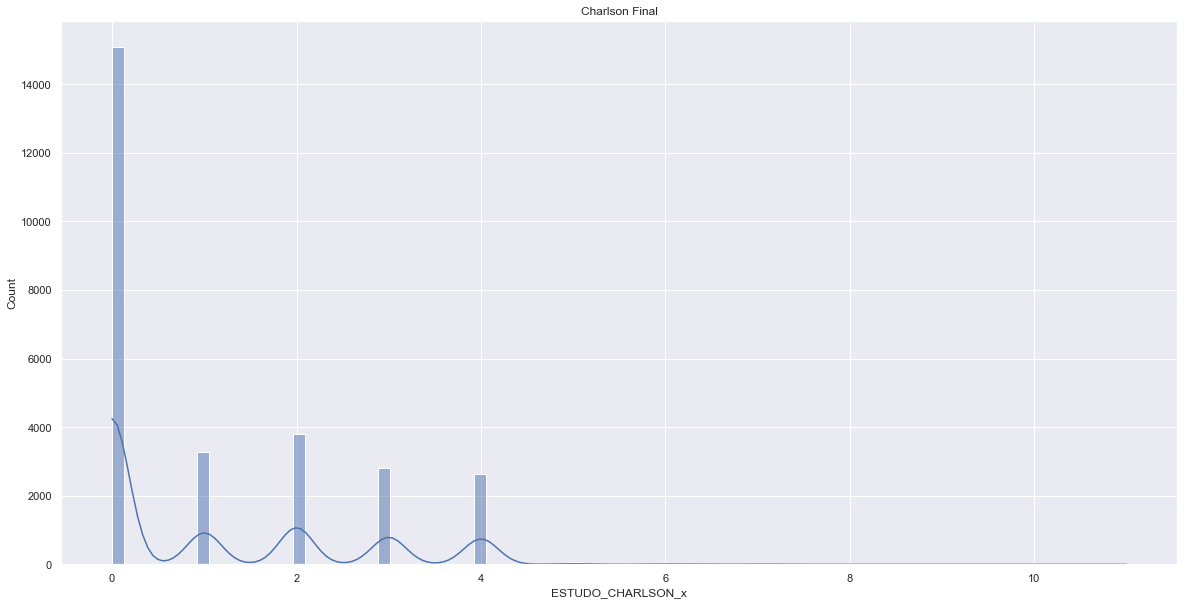

In [709]:
plt.figure(figsize=(20, 10))
sns.histplot(merged['ESTUDO_CHARLSON_x'], kde=True)
plt.title("Charlson Final")
plt.show()

In [710]:
data['ESTUDO_CHARLSON'] = merged['ESTUDO_CHARLSON_x']
resume('ESTUDO_CHARLSON', data)

Valores Faltantes:  0
0.0     10065
2.0      2324
1.0      2091
3.0      1727
4.0      1673
5.0        64
6.0        31
7.0        22
10.0        9
8.0         6
11.0        1
9.0         1
Name: ESTUDO_CHARLSON, dtype: int64
ESTUDO_CHARLSON:  [1.0, 5.0, 2.0, 6.0, 8.0, 4.0, 3.0, 7.0, 9.0, 10.0, 0.0, 11.0]


0

#### ESTUDO_FR_DIA_COLETA

In [711]:
data['ESTUDO_FR_DIA_COLETA'].value_counts() #DROP SEM INFO NO DICIONARIO

13    2
18    2
23    2
NC    2
22    2
26    1
20    1
17    1
Name: ESTUDO_FR_DIA_COLETA, dtype: int64

In [712]:
data = data.drop(['ESTUDO_FR_DIA_COLETA'], axis=1)

#### ESTUDO_FC_DIA_COLETA

In [713]:
data['ESTUDO_FC_DIA_COLETA'] = data['ESTUDO_FC_DIA_COLETA'].fillna('NI')

In [714]:
data['ESTUDO_FC_DIA_COLETA'].value_counts() #DROP SEM INFO NO DICIONARIO

NI       18001
105.0        2
100.0        2
96.0         2
82.0         2
63.0         2
95.0         1
66.0         1
64.0         1
Name: ESTUDO_FC_DIA_COLETA, dtype: int64

In [715]:
data = data.drop(['ESTUDO_FC_DIA_COLETA'], axis=1)

#### ESTUDO_PA_DIA_COLETA

In [716]:
data['ESTUDO_PA_DIA_COLETA'] = data['ESTUDO_PA_DIA_COLETA'].fillna('NI')

In [717]:
data['ESTUDO_PA_DIA_COLETA'].value_counts() #DROP SEM INFO NO DICIONARIO

NI        18001
110/80        2
156/30        2
109/64        2
149/77        2
109/74        2
115/65        1
170/90        1
120/60        1
Name: ESTUDO_PA_DIA_COLETA, dtype: int64

In [718]:
data = data.drop(['ESTUDO_PA_DIA_COLETA'], axis=1)

#### ESTUDO_TEMPERATURA_DIA_COLETA

In [719]:
data['ESTUDO_TEMPERATURA_DIA_COLETA'] = data['ESTUDO_TEMPERATURA_DIA_COLETA'].fillna('NI')

In [720]:
data['ESTUDO_TEMPERATURA_DIA_COLETA'].value_counts() #DROP SEM INFO NO DICIONARIO

NI      18001
36,4        4
36,8        2
36          2
36,3        2
36,9        1
37,3        1
37,9        1
Name: ESTUDO_TEMPERATURA_DIA_COLETA, dtype: int64

In [721]:
data = data.drop(['ESTUDO_TEMPERATURA_DIA_COLETA'], axis=1)

#### ESTUDO_SATURACAO_DIA_COLETA

In [722]:
data['ESTUDO_SATURACAO_DIA_COLETA'] = data['ESTUDO_SATURACAO_DIA_COLETA'].fillna('NI')

In [723]:
data['ESTUDO_SATURACAO_DIA_COLETA'].value_counts() #DROP SEM INFO NO DICIONARIO

NI        18003
95            4
91            2
97            2
93            2
76-88%        1
Name: ESTUDO_SATURACAO_DIA_COLETA, dtype: int64

In [724]:
data = data.drop(['ESTUDO_SATURACAO_DIA_COLETA'], axis=1)

#### ESTUDO_APACHE2

In [725]:
data['ESTUDO_APACHE2'] = data['ESTUDO_APACHE2'].fillna('NI')

In [726]:
data['ESTUDO_APACHE2'].value_counts() #DROP

NI    18014
Name: ESTUDO_APACHE2, dtype: int64

In [727]:
data = data.drop(['ESTUDO_APACHE2'], axis=1)

#### ESTUDO_RISCO

In [728]:
data['ESTUDO_RISCO'].value_counts() #DROP SEM INFO NO DICIONARIO

Series([], Name: ESTUDO_RISCO, dtype: int64)

In [729]:
data = data.drop(['ESTUDO_RISCO'], axis=1)

#### ESTUDO_TRATAMENTO

In [730]:
data['ESTUDO_TRATAMENTO'].value_counts() #DROP SEM INFO NO DICIONARIO

D    5
N    3
Name: ESTUDO_TRATAMENTO, dtype: int64

In [731]:
data = data.drop(['ESTUDO_TRATAMENTO'], axis=1)

#### ESTUDO_COMORB_PREV_TX_ORG_SOL

In [732]:
data['ESTUDO_COMORB_PREV_TX_ORG_SOL'].value_counts() #DROP SEM INFO NO DICIONARIO

N    17976
S       12
Name: ESTUDO_COMORB_PREV_TX_ORG_SOL, dtype: int64

In [733]:
data = data.drop(['ESTUDO_COMORB_PREV_TX_ORG_SOL'], axis=1)

#### ESTUDO_CONDUTA

In [734]:
data['ESTUDO_CONDUTA'].value_counts() #DROP SEM INFO NO DICIONARIO

L    17986
Name: ESTUDO_CONDUTA, dtype: int64

In [735]:
data = data.drop(['ESTUDO_CONDUTA'], axis=1)

#### ESTUDO_LOCAL_CONTAMINACAO

In [736]:
data['ESTUDO_LOCAL_CONTAMINACAO'] = data['ESTUDO_LOCAL_CONTAMINACAO'].fillna('NI')

In [737]:
data['ESTUDO_LOCAL_CONTAMINACAO'].value_counts()

NI                                  17131
EXTERNO                               534
HSL                                   166
UNIDADE DE INTERNACAO HSL             113
OUTRA INSTITUIÇÃO DE SAÚDE             38
DESCONHECIDO                           27
INSTITUIÇÃO DE LONGA PERMANÊNCIA        4
OUTRA INSTITUICAO DE SAUDE              1
Name: ESTUDO_LOCAL_CONTAMINACAO, dtype: int64

In [738]:
keys = data['ESTUDO_LOCAL_CONTAMINACAO'].value_counts().keys().tolist()

In [739]:
dictToReplace = __getDictToReplace(keys)

In [740]:
dictToReplace

{'NI': 1,
 'EXTERNO': 2,
 'HSL': 3,
 'UNIDADE DE INTERNACAO HSL': 4,
 'OUTRA INSTITUIÇÃO DE SAÚDE': 5,
 'DESCONHECIDO': 6,
 'INSTITUIÇÃO DE LONGA PERMANÊNCIA': 7,
 'OUTRA INSTITUICAO DE SAUDE': 8}

In [741]:
data['ESTUDO_LOCAL_CONTAMINACAO'] = data['ESTUDO_LOCAL_CONTAMINACAO'].replace(dictToReplace)

#### ESTUDO_LOCAL_CONTAM_UI

In [742]:
data['ESTUDO_LOCAL_CONTAM_UI'] = data['ESTUDO_LOCAL_CONTAM_UI'].fillna('NI')

In [743]:
data['ESTUDO_LOCAL_CONTAM_UI'].value_counts()

NI      17892
15.0       36
13.0       19
12.0       17
19.0       10
18.0        8
14.0        7
9.0         7
8.0         6
16.0        5
6.0         5
17.0        1
5.0         1
Name: ESTUDO_LOCAL_CONTAM_UI, dtype: int64

In [744]:
data['ESTUDO_LOCAL_CONTAM_UI'] = data['ESTUDO_LOCAL_CONTAM_UI'].replace({'NI': 2})

#### ESTUDO_DT_DESFECHO

In [745]:
data['ESTUDO_DT_DESFECHO'].value_counts() #DROP

26/08/2020    2
17/08/2020    2
22/09/2020    2
01/09/2020    2
23/09/2020    2
20/10/2020    1
18/11/2020    1
15/08/2020    1
Name: ESTUDO_DT_DESFECHO, dtype: int64

In [746]:
data = data.drop(['ESTUDO_DT_DESFECHO'], axis=1)

#### ESTUDO_COMORB_PREV_DESCON

In [747]:
data['ESTUDO_COMORB_PREV_DESCON'].value_counts() #DROP

N    17976
S       12
Name: ESTUDO_COMORB_PREV_DESCON, dtype: int64

In [748]:
data = data.drop(['ESTUDO_COMORB_PREV_DESCON'], axis=1)

#### ESTUDO_COMORB_PREV_DVP

In [749]:
data['ESTUDO_COMORB_PREV_DVP'].value_counts() #DROP

N    17985
S        3
Name: ESTUDO_COMORB_PREV_DVP, dtype: int64

In [750]:
data = data.drop(['ESTUDO_COMORB_PREV_DVP'], axis=1)

#### ESTUDO_COMORB_PREV_DEMENCIA

In [751]:
data['ESTUDO_COMORB_PREV_DEMENCIA'] = data['ESTUDO_COMORB_PREV_DEMENCIA'].fillna('NI')

In [752]:
data['ESTUDO_COMORB_PREV_DEMENCIA'].value_counts()

N     17977
NI       26
S        11
Name: ESTUDO_COMORB_PREV_DEMENCIA, dtype: int64

In [753]:
data['ESTUDO_COMORB_PREV_DEMENCIA'] = data['ESTUDO_COMORB_PREV_DEMENCIA'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_DTC

In [754]:
data['ESTUDO_COMORB_PREV_DTC'].value_counts() #DROP

N    17988
Name: ESTUDO_COMORB_PREV_DTC, dtype: int64

In [755]:
data = data.drop(['ESTUDO_COMORB_PREV_DTC'], axis=1)

#### ESTUDO_COMORB_PREV_UP

In [756]:
data['ESTUDO_COMORB_PREV_UP'].value_counts() #DROP SEM INFO NO DICIONARIO

N    17986
S        2
Name: ESTUDO_COMORB_PREV_UP, dtype: int64

In [757]:
data = data.drop(['ESTUDO_COMORB_PREV_UP'], axis=1)

#### ESTUDO_COMORB_PREV_DFL

In [758]:
data['ESTUDO_COMORB_PREV_DFL'].value_counts() #DROP SEM INFO NO DICIONARIO

N    17988
Name: ESTUDO_COMORB_PREV_DFL, dtype: int64

In [759]:
data = data.drop(['ESTUDO_COMORB_PREV_DFL'], axis=1)

#### ESTUDO_COMORB_PREV_DFM

In [760]:
data['ESTUDO_COMORB_PREV_DFM'] = data['ESTUDO_COMORB_PREV_DFM'].fillna('NI')

In [761]:
data['ESTUDO_COMORB_PREV_DFM'].value_counts()

N     17973
NI       26
S        15
Name: ESTUDO_COMORB_PREV_DFM, dtype: int64

In [762]:
data['ESTUDO_COMORB_PREV_DFM'] = data['ESTUDO_COMORB_PREV_DFM'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_HEMIPLEGIA

In [763]:
data['ESTUDO_COMORB_PREV_HEMIPLEGIA'].value_counts() #DROP

N    17988
Name: ESTUDO_COMORB_PREV_HEMIPLEGIA, dtype: int64

In [764]:
data = data.drop(['ESTUDO_COMORB_PREV_HEMIPLEGIA'], axis=1)

#### ESTUDO_COMORB_PREV_LEUCEMIA',

In [765]:
data['ESTUDO_COMORB_PREV_LEUCEMIA'] = data['ESTUDO_COMORB_PREV_LEUCEMIA'].fillna('NI')

In [766]:
data['ESTUDO_COMORB_PREV_LEUCEMIA'].value_counts()

N     17981
NI       26
S         7
Name: ESTUDO_COMORB_PREV_LEUCEMIA, dtype: int64

In [767]:
data['ESTUDO_COMORB_PREV_LEUCEMIA'] = data['ESTUDO_COMORB_PREV_LEUCEMIA'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_HIV

In [768]:
data['ESTUDO_COMORB_PREV_HIV'] = data['ESTUDO_COMORB_PREV_HIV'].fillna('NI')

In [769]:
data['ESTUDO_COMORB_PREV_HIV'].value_counts()

N     17983
NI       26
S         5
Name: ESTUDO_COMORB_PREV_HIV, dtype: int64

In [770]:
data['ESTUDO_COMORB_PREV_HIV'] = data['ESTUDO_COMORB_PREV_HIV'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_TUL

In [771]:
data['ESTUDO_COMORB_PREV_TUL'] = data['ESTUDO_COMORB_PREV_TUL'].fillna('NI')

In [772]:
data['ESTUDO_COMORB_PREV_TUL'].value_counts()

N     17957
S        31
NI       26
Name: ESTUDO_COMORB_PREV_TUL, dtype: int64

In [773]:
data['ESTUDO_COMORB_PREV_TUL'] = data['ESTUDO_COMORB_PREV_TUL'].replace({'S': 1, 'N': 0, 'NI': 2})

#### ESTUDO_COMORB_PREV_TUM

In [774]:
data['ESTUDO_COMORB_PREV_TUM'].value_counts() #DROP SEM INFO NO DICIONARIO

N    17976
S       12
Name: ESTUDO_COMORB_PREV_TUM, dtype: int64

In [775]:
data = data.drop(['ESTUDO_COMORB_PREV_TUM'], axis=1)

#### STATUS_COVID_FROM_UTI

In [776]:
data['STATUS_COVID_FROM_UTI'].value_counts()

NEGATIVOS      848
CONFIRMADOS    450
SUSPEITOS       11
Name: STATUS_COVID_FROM_UTI, dtype: int64

In [777]:
data = data.drop(['STATUS_COVID_FROM_UTI'], axis=1)

#### DTHR_LEITO

In [778]:
data['DTHR_LEITO'].value_counts() #DROP

19/08/2020 17:21:30    1
04/03/2021 18:39:08    1
11/12/2020 14:48:16    1
16/06/2020 23:24:45    1
19/01/2021 09:46:55    1
                      ..
17/06/2020 13:00:09    1
15/01/2021 19:54:56    1
26/09/2020 19:18:14    1
29/07/2020 16:43:38    1
12/07/2020 17:23:02    1
Name: DTHR_LEITO, Length: 155, dtype: int64

In [779]:
data = data.drop(['DTHR_LEITO'], axis=1)

#### DATA_HORA_ENTRADA

In [780]:
data['DATA_HORA_ENTRADA'].value_counts() #DROP

2020-11-14 19:52:42    1
2020-11-10 00:47:45    1
2020-11-30 13:28:15    1
2020-11-26 01:06:41    1
2020-11-20 22:24:53    1
                      ..
2020-08-30 18:15:50    1
2020-08-14 13:29:36    1
2020-07-02 16:20:53    1
2020-09-24 14:11:07    1
2020-08-07 20:35:49    1
Name: DATA_HORA_ENTRADA, Length: 1309, dtype: int64

In [781]:
data = data.drop(['DATA_HORA_ENTRADA'], axis=1)

#### REENTRADA

In [782]:
data['REENTRADA'].value_counts()

0.0    1154
1.0     134
2.0      17
4.0       2
3.0       2
Name: REENTRADA, dtype: int64

In [783]:
#keys = data['REENTRADA'].value_counts().keys().tolist()

In [784]:
#dictToReplace = __getDictToReplace(keys)

In [785]:
#dictToReplace

In [786]:
#data['REENTRADA'] = data['REENTRADA'].replace(dictToReplace)

In [787]:
data = data.drop(['REENTRADA'], axis=1)

#### CD_ATENDIMENTO.1

In [788]:
#data['CD_ATENDIMENTO.1'].value_counts() #DROP

In [789]:
#data = data.drop(['CD_ATENDIMENTO.1'], axis=1)

#### DTHR_UTI_IN

In [790]:
data['DTHR_IN_UTI'].value_counts() #DROP

27/03/2020 07:26:07    1
30/08/2020 18:15:50    1
28/10/2020 21:54:03    1
05/07/2020 00:09:31    1
12/01/2021 18:31:00    1
                      ..
18/09/2020 17:43:36    1
11/09/2020 06:27:44    1
22/11/2020 11:16:27    1
28/01/2021 12:04:20    1
27/10/2020 16:59:52    1
Name: DTHR_IN_UTI, Length: 1309, dtype: int64

In [791]:
data = data.drop(['DTHR_IN_UTI'], axis=1)

#### DTHR_UTI_OUT

In [792]:
data['DTHR_OUT_UTI'].value_counts() #DROP

13/01/2021 18:02:08    1
19/02/2021 10:16:56    1
10/09/2020 18:58:04    1
16/01/2021 07:15:00    1
08/12/2020 10:10:57    1
                      ..
07/08/2020 10:44:17    1
08/08/2020 12:37:32    1
12/02/2021 14:05:51    1
31/12/2020 10:23:58    1
29/10/2020 09:21:05    1
Name: DTHR_OUT_UTI, Length: 1309, dtype: int64

In [793]:
data = data.drop(['DTHR_OUT_UTI'], axis=1)

### Unnamed: 0

In [794]:
data['Unnamed: 0'].value_counts() #DROP

2047     1
10944    1
6838     1
4791     1
25273    1
        ..
17762    1
21856    1
11615    1
9566     1
2049     1
Name: Unnamed: 0, Length: 18014, dtype: int64

In [795]:
data = data.drop(['Unnamed: 0'], axis=1)

## Ver Features

In [796]:
showMissing(data)

COLETOU_AMOSTRA , 0 ,
IFI_OUTRO_VIRUS , 0 ,
STATUS_COVID_FROM_MRG_REG_EST , 0 ,
CD_PACIENTE , 0 ,
GENERO , 0 ,
IDADE , 0 ,
DIAGNOSTICO_SARS , 0 ,
CD_CID , 0 ,
DS_ESPECIALID_SAI , 0 ,
REINTER_30D , 0 ,
CARATER_ATENDIMENTO , 0 ,
EMERG_SERVICO , 0 ,
EMERG_RISCO , 0 ,
CID_DIAG_ATEND , 0 ,
CID_CAPITULO_DIAG , 0 ,
BLOCO_CENTRAL_ST , 0 ,
HEMODINAMICA_ST , 0 ,
EX_LAB_ST , 0 ,
EX_IMG_ST , 0 ,
EX_OUTROS_ST , 0 ,
TIPO_REGISTRO , 0 ,
SN_CRIT_CONTATO_CASO_COVID , 0 ,
SN_CRIT_SRAG , 0 ,
SN_CRIT_SINDROME_GRIPAL , 0 ,
ESTUDO_TP_EXPOSICAO , 0 ,
ESTUDO_COMORB_PREV_HAS , 0 ,
ESTUDO_COMORB_PREV_IAM , 0 ,
ESTUDO_COMORB_PREV_IC , 0 ,
ESTUDO_COMORB_PREV_DRC , 0 ,
ESTUDO_COMORB_PREV_DMII , 0 ,
ESTUDO_COMORB_PREV_CARCINOMA , 0 ,
ESTUDO_COMORB_PREV_AVC , 0 ,
ESTUDO_COMORB_PREV_ASMA , 0 ,
ESTUDO_COMORB_PREV_DPOC , 0 ,
ESTUDO_COMORB_PREV_OBESIDADE , 0 ,
ESTUDO_COMORB_PREV_EPILEPSIA , 0 ,
ESTUDO_COMORB_PREV_HIGIDO , 0 ,
ESTUDO_COMORB_PREV_OUTRAS , 0 ,
ESTUDO_CHARLSON , 0 ,
ESTUDO_LOCAL_CONTAMINACAO , 0 ,
ESTUDO_LO

## Checando dados faltantes

In [797]:
columns = data.columns.tolist()

In [798]:
for c in columns:
    _aux = data[c].isnull().tolist()
    _aux = [str(v) for v in _aux]
    if 'True' in _aux:
        print(c)
    _aux = []

In [800]:
data.to_csv(r'./data/PosProcessing-v0.2.2/PosFinal_Dataset.csv', index=False)

## Mapa de Calor - Pearson

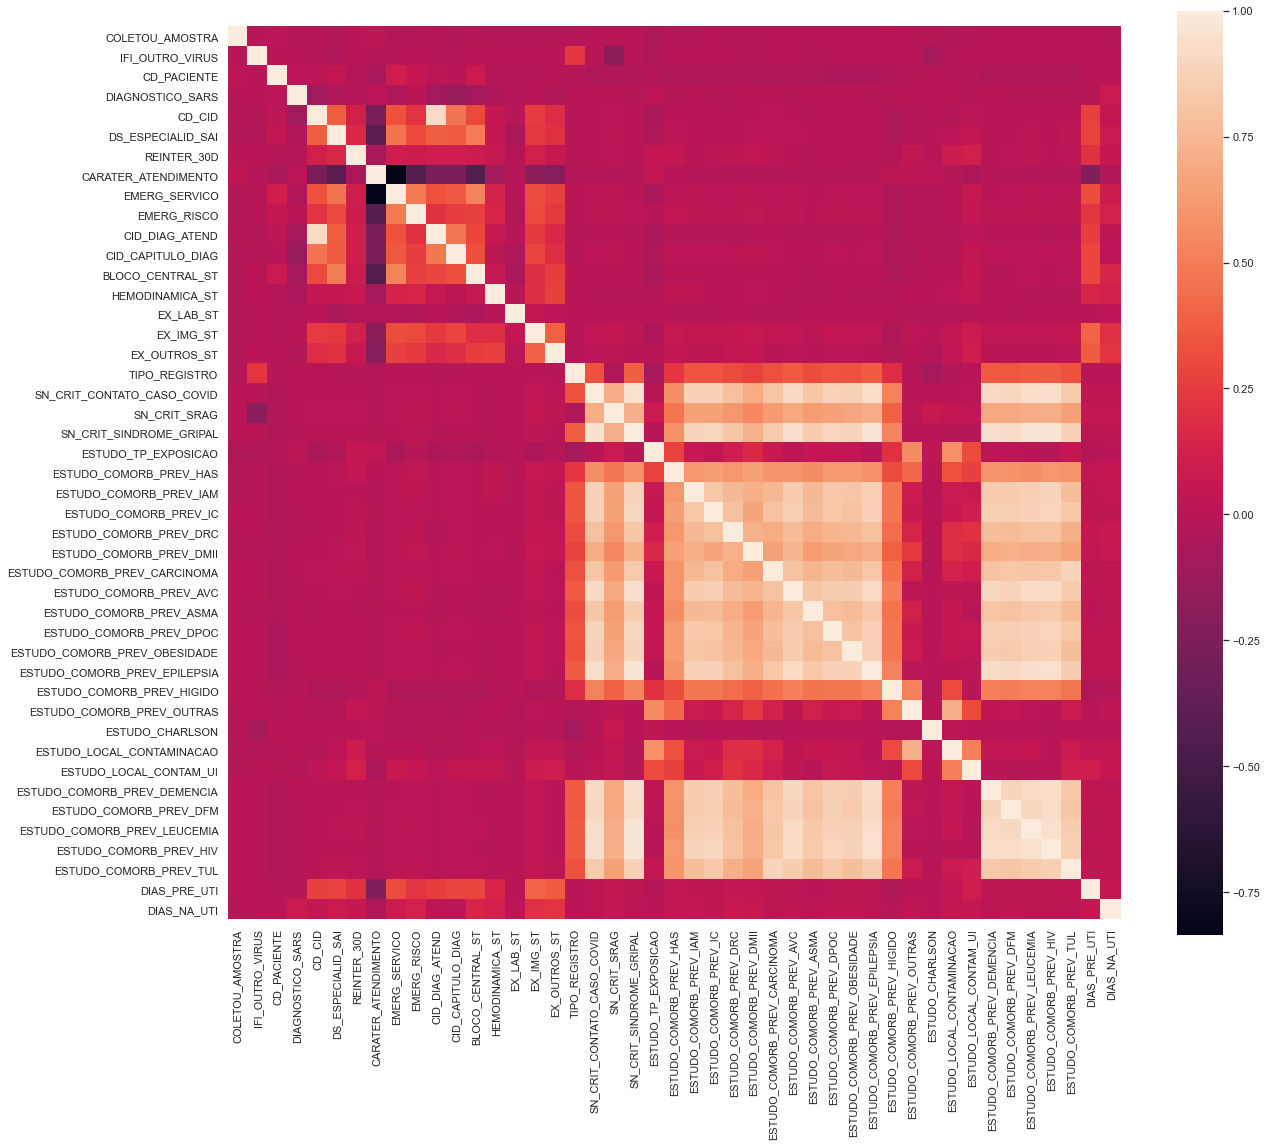

In [547]:
sns.set(rc={'figure.figsize':(20, 17)})
corr_matrix = data.corr(method='pearson')
plt.subplots(figsize=(20,17))
sns.heatmap(corr_matrix, vmax=1, square=True)
plt.savefig('heatmap.png')
plt.show()